In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [2]:
data = pd.read_csv('trips_with_weather_and_holidays_and_neigh.csv.gz', compression='gzip' )
data.drop(data.columns[0], axis =1 , inplace=True)
data.head()

,Input,Output,Station Number,date,day_part,capacity,lat,lon,short_name,station_id,...,region__41,region__42,region__44,snow,thunder,rain,meantempm,meanwindspdm,holiday,weekday
0,0,0,12th & Newton St NE,2015-01-01,0,11.0,38.933668,-76.991016,31501,73,...,0.0,1.0,0.0,0,0,0,3,13,1.0,3
1,2,0,Wilson Blvd & Franklin Rd,2015-01-01,0,11.0,38.890400,-77.088900,31020,138,...,1.0,0.0,0.0,0,0,0,3,13,1.0,3
2,0,1,18th & Eads St.,2015-01-01,0,11.0,38.857250,-77.053320,31001,2,...,1.0,0.0,0.0,0,0,0,3,13,1.0,3
3,0,0,18th St & Rhode Island Ave NE,2015-01-01,0,15.0,38.927095,-76.978924,31510,235,...,0.0,1.0,0.0,0,0,0,3,13,1.0,3
4,0,0,10th & Florida Ave NW,2015-01-01,0,19.0,38.920387,-77.025672,31120,274,...,0.0,1.0,0.0,0,0,0,3,13,1.0,3


In [3]:
data.head().T

,0,1,2,3,4
Input,0,2,0,0,0
Output,0,0,1,0,0
Station Number,12th & Newton St NE,Wilson Blvd & Franklin Rd,18th & Eads St.,18th St & Rhode Island Ave NE,10th & Florida Ave NW
date,2015-01-01,2015-01-01,2015-01-01,2015-01-01,2015-01-01
day_part,0,0,0,0,0
capacity,11,11,11,15,19
lat,38.9337,38.8904,38.8573,38.9271,38.9204
lon,-76.991,-77.0889,-77.0533,-76.9789,-77.0257
short_name,31501,31020,31001,31510,31120
station_id,73,138,2,235,274


In [4]:
# data.drop(['Station Number', 'short_name'], axis = 1, inplace=True)
data = data[['Input', 'Output', 'date', 'day_part', 'snow', 'thunder', 'rain', 
             'meantempm', 'meanwindspdm', 'holiday', 'weekday']]
data.head()

,Input,Output,date,day_part,snow,thunder,rain,meantempm,meanwindspdm,holiday,weekday
0,0,0,2015-01-01,0,0,0,0,3,13,1.0,3
1,2,0,2015-01-01,0,0,0,0,3,13,1.0,3
2,0,1,2015-01-01,0,0,0,0,3,13,1.0,3
3,0,0,2015-01-01,0,0,0,0,3,13,1.0,3
4,0,0,2015-01-01,0,0,0,0,3,13,1.0,3


In [28]:
df_features = data.groupby(['date'])['snow', 
                                   'thunder','rain','meantempm' , 
                                   'meanwindspdm', 'holiday', 'weekday'].first()
df_features

,snow,thunder,rain,meantempm,meanwindspdm,holiday,weekday
date,,,,,,,
2015-01-01,0,0,0,3,13,1.0,3
2015-01-02,0,0,0,6,5,0.0,4
2015-01-03,0,0,1,3,5,0.0,5
2015-01-04,0,0,1,13,20,0.0,6
2015-01-05,0,0,0,5,23,0.0,0
2015-01-06,1,0,0,-2,8,0.0,1
2015-01-07,1,0,0,-5,25,0.0,2
2015-01-08,0,0,0,-7,18,0.0,3
2015-01-09,0,0,0,1,20,0.0,4


In [27]:
df_y = data.groupby(['date'])['Input', 'Output'].sum()
df_y

,Input,Output
date,,
2015-01-01,2513,2502
2015-01-02,4925,4898
2015-01-03,1649,1632
2015-01-04,3543,3519
2015-01-05,5040,5027
2015-01-06,2010,2013
2015-01-07,2963,2958
2015-01-08,2879,2862
2015-01-09,4080,4047


In [30]:
data = df_y.join(df_features)

In [31]:
# data = data.join( pd.get_dummies(data.day_part, prefix='day_part_'))
# data.drop('day_part', axis = 1, inplace=True)

data = data.join(pd.get_dummies(data.weekday, prefix = 'weekday'))
data.drop('weekday', axis = 1, inplace=True)
# data = data.join(pd.get_dummies(data.station_id, prefix='st_id_'))

print data.shape
data.head().T

(822, 15)


date,2015-01-01,2015-01-02,2015-01-03,2015-01-04,2015-01-05
Input,2513.0,4925.0,1649.0,3543.0,5040.0
Output,2502.0,4898.0,1632.0,3519.0,5027.0
snow,0.0,0.0,0.0,0.0,0.0
thunder,0.0,0.0,0.0,0.0,0.0
rain,0.0,0.0,1.0,1.0,0.0
meantempm,3.0,6.0,3.0,13.0,5.0
meanwindspdm,13.0,5.0,5.0,20.0,23.0
holiday,1.0,0.0,0.0,0.0,0.0
weekday_0,0.0,0.0,0.0,0.0,1.0
weekday_1,0.0,0.0,0.0,0.0,0.0


In [46]:
data['date'] = data.index
data.Input = (data.Input - data.Input.mean())/data.Input.std()
data.Output = (data.Output - data.Output.mean())/data.Output.std()
data

,Input,Output,snow,thunder,rain,meantempm,meanwindspdm,holiday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,date
date,,,,,,,,,,,,,,,,
2015-01-01,-1.797726,-1.798476,0,0,0,3,13,1.0,0,0,0,1,0,0,0,2015-01-01
2015-01-02,-1.066175,-1.070677,0,0,0,6,5,0.0,0,0,0,0,1,0,0,2015-01-02
2015-01-03,-2.059774,-2.062743,0,0,1,3,5,0.0,0,0,0,0,0,1,0,2015-01-03
2015-01-04,-1.485330,-1.489556,0,0,1,13,20,0.0,0,0,0,0,0,0,1,2015-01-04
2015-01-05,-1.031296,-1.031493,0,0,0,5,23,0.0,1,0,0,0,0,0,0,2015-01-05
2015-01-06,-1.950284,-1.947012,1,0,0,-2,8,0.0,0,1,0,0,0,0,0,2015-01-06
2015-01-07,-1.661242,-1.659963,1,0,0,-5,25,0.0,0,0,1,0,0,0,0,2015-01-07
2015-01-08,-1.686719,-1.689124,0,0,0,-7,18,0.0,0,0,0,1,0,0,0,2015-01-08
2015-01-09,-1.322460,-1.329173,0,0,0,1,20,0.0,0,0,0,0,1,0,0,2015-01-09


In [47]:
# import gc
train_data = data[pd.to_datetime(data.date).dt.year != 2017]
#train_data

test_data = data[pd.to_datetime(data.date).dt.year == 2017]
#test_data

print "Load 1"
df_test = test_data.copy()
# df_test.drop(['date', 'station_id', 'capacity'], axis = 1, inplace=True)
df_test.drop(['date'], axis = 1, inplace=True)
#df_test.head()

# del test_data
# gc.collect()

print "Load 2"
df_train = train_data.copy()
# df_train.drop(['date', 'station_id', 'capacity'], axis = 1, inplace=True)
df_train.drop(['date'], axis = 1, inplace=True)

# del train_data
# gc.collect()

#df_train.head()
print "Load 3"
X_train = df_train.drop(['Input', 'Output'], axis = 1).values
y_train = df_train[['Input', 'Output']].values

# del df_train
# gc.collect()

print "Load 4"
X_test = df_test.drop(['Input', 'Output'], axis = 1).values
y_test =df_test[['Input', 'Output']].values

# del df_test
# gc.collect()

print "Load 5"


from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=300)
# model = LassoCV()
model = RandomForestRegressor()

my_y = model.fit(X_train, y_train).predict(X_test)
# my_y_inp = model.fit(X_train, y_train[:, 0]).predict(X_test)
# my_y_otp = model.fit(X_train, y_train[:, 1]).predict(X_test)

print "MSE: ", mean_squared_error(y_test, my_y)

# np.savetxt("my_random_forests_results_2017_Q1.csv", my_y, delimiter=",")

Load 1
Load 2
Load 3
Load 4
Load 5
MSE:  0.370361273166


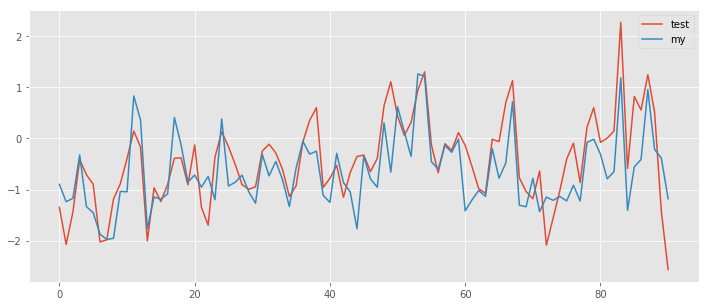

In [48]:
plt.plot(np.arange(y_test.shape[0]), y_test[:,0], label=  "test")
plt.plot(np.arange(my_y.shape[0]), my_y[:,0],label = "my")
plt.legend()

In [44]:
from tqdm import tqdm_notebook

train_data = data[pd.to_datetime(data.date).dt.year != 2017]
test_data = data[pd.to_datetime(data.date).dt.year == 2017]

st_ids = test_data.station_id.unique()

mse_s = []
for st_id in tqdm_notebook(st_ids):
    st_indexes = np.argwhere(test_data.station_id == st_id).ravel()
    st_my_y = my_y[st_indexes]
    st_test_y = test_data.iloc[st_indexes][['Input', 'Output']].values
    mse = mean_squared_error(st_test_y, st_my_y)
    mse_s.append(mse)

mse_s = np.array(mse_s)

min_mse_ind = np.argmin(np.array(mse_s))
st_min_mse = [st_ids[min_mse_ind], mse_s[min_mse_ind]]
print st_min_mse
# for m in np.sort(mse_s): print m

med_mse_ind = np.where(mse_s == np.median(mse_s))[0]
st_med_mse = [st_ids[med_mse_ind][0], mse_s[med_mse_ind][0]]
print st_med_mse


[379, 0.35665650564787799]
[353, 22.571123637043204]


In [46]:
mse_s.mean()

54.129146980754072

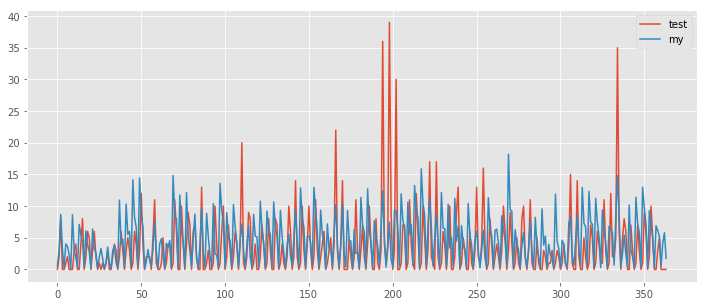

In [51]:
st_id = st_med_mse[0]
st_indexes = np.argwhere(test_data.station_id == st_id).ravel()
st_my_y = my_y[st_indexes]
st_test_y = test_data.iloc[st_indexes][['Input', 'Output']].values

plt.plot(np.arange(st_test_y.shape[0]), st_test_y[:,0], label=  "test")
plt.plot(np.arange(st_my_y.shape[0]), st_my_y[:,0],label = "my")
plt.legend()

In [54]:
max_test_inp_id = np.argmax(st_test_y[:,0])
test_data.iloc[st_indexes].iloc[max_test_inp_id]

Input                                  39
Output                                 30
date                           2017-02-19
capacity                               23
lat                                38.908
lon                               -76.997
station_id                            353
neigh__Alcova Heights                   0
neigh__Alexandria                       0
neigh__Arlington                        0
neigh__Arlington Heights                0
neigh__Arlington Mill                   0
neigh__Arlington Ridge                  0
neigh__Ashton Heights                   0
neigh__Aurora Highlands                 0
neigh__Barcroft                         0
neigh__Bellevue                         0
neigh__Bethesda                         0
neigh__Bluemont                         0
neigh__Buckingham                       0
neigh__Capitol Hill                     0
neigh__Carver / Langston                0
neigh__Chevy Chase                      0
neigh__Claremont                  

In [19]:
np.max(my_y[:,0])

100.15277361527362

In [17]:
data[data.Input > 100]

,Input,Output,date,capacity,lat,lon,station_id,neigh__Alcova Heights,neigh__Alexandria,neigh__Arlington,...,day_part__6,day_part__12,day_part__18,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
47613,142,131,2015-02-08,23.0,38.888553,-77.032429,168,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
47758,146,145,2015-02-08,25.0,38.888251,-77.049426,204,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
81770,126,111,2015-03-08,25.0,38.888251,-77.049426,204,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
82849,105,102,2015-03-09,23.0,38.888553,-77.032429,168,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
86225,104,100,2015-03-12,55.0,38.896960,-77.004930,113,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
86529,114,102,2015-03-12,23.0,38.888553,-77.032429,168,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
86675,111,109,2015-03-12,25.0,38.888251,-77.049426,204,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
90225,113,109,2015-03-15,23.0,38.888553,-77.032429,168,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
90371,174,173,2015-03-15,25.0,38.888251,-77.049426,204,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
91457,142,141,2015-03-16,23.0,38.888553,-77.032429,168,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
